<a href="https://colab.research.google.com/github/Elay-math/Metodos-Numericos-/blob/main/Comparacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de Lagrange:
53.6893005545836*x**8 - 1.77635683940025e-15*x**7 - 102.815010562028*x**6 - 1.4210854715202e-14*x**5 + 61.3672060920176*x**4 + 8.88178419700125e-15*x**3 - 13.203034546112*x**2 + 2.22044604925031e-16*x + 1.0


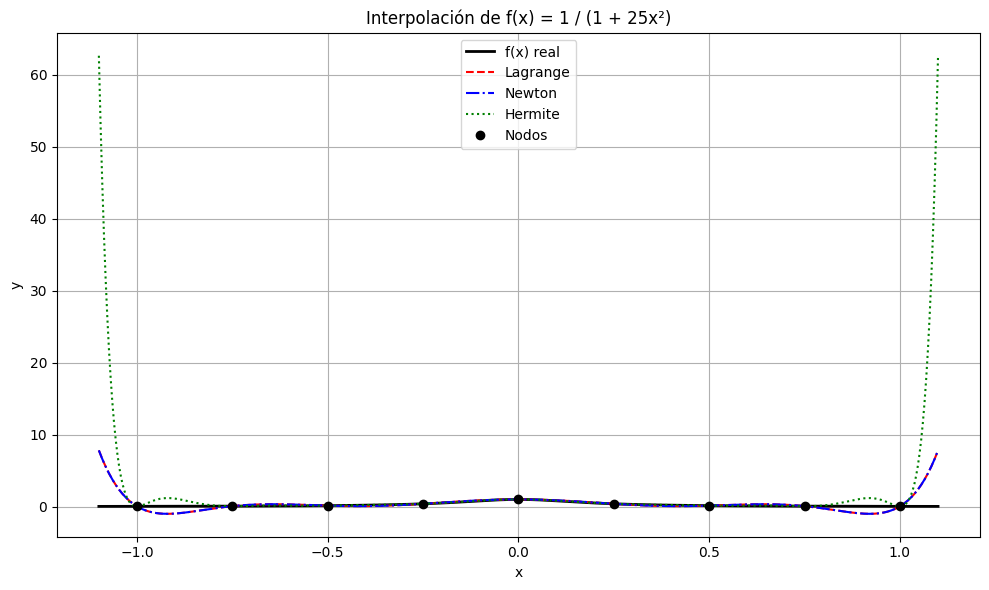

In [1]:
# Interpolación de f(x) = 1 / (1 + 25x^2) con Lagrange, Newton y Hermite

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import BarycentricInterpolator
from tabulate import tabulate

# Definimos la función f(x)
def f(x):
    return 1 / (1 + 25 * x**2)

# Derivada simbólica de f(x) para Hermite
def df(x):
    return (-50 * x) / (1 + 25 * x**2)**2

# Puntos igualmente espaciados en [-1, 1]
x_nodes = np.linspace(-1, 1, 9)
y_nodes = f(x_nodes)
dy_nodes = df(x_nodes)

# Evaluación en una malla densa para graficar
x_eval = np.linspace(-1.1, 1.1, 500)
y_true = f(x_eval)

# -------------------------------------------
# Polinomio de Lagrange (simbólico)
def polinomio_lagrange(nodos, valores):
    x = sp.Symbol('x')
    n = len(nodos)
    polinomio = 0
    for i in range(n):
        xi, yi = nodos[i], valores[i]
        termino = 1
        for j in range(n):
            if j != i:
                xj = nodos[j]
                termino *= (x - xj) / (xi - xj)
        polinomio += yi * termino
    polinomio = sp.simplify(polinomio)
    print("Polinomio de Lagrange:")
    print(polinomio)
    return sp.lambdify(x, polinomio, 'numpy')

f_lagrange = polinomio_lagrange(x_nodes, y_nodes)
y_lagrange = f_lagrange(x_eval)

# -------------------------------------------
# Polinomio de Newton (diferencias divididas)
def newton_dif_divididas(xi, fi):
    n = len(xi)
    tabla = np.zeros((n, n))
    tabla[:, 0] = fi
    for j in range(1, n):
        for i in range(j, n):
            numerador = tabla[i][j - 1] - tabla[i - 1][j - 1]
            denominador = xi[i] - xi[i - j]
            tabla[i][j] = numerador / denominador
    coefs = [tabla[i][i] for i in range(n)]
    return coefs

def evaluar_newton(x, xi, coefs):
    n = len(coefs)
    p = coefs[-1]
    for k in range(n - 2, -1, -1):
        p = p * (x - xi[k]) + coefs[k]
    return p

newton_coefs = newton_dif_divididas(x_nodes, y_nodes)
y_newton = [evaluar_newton(xi, x_nodes, newton_coefs) for xi in x_eval]

# -------------------------------------------
# Polinomio de Hermite con nodos y derivadas
def interpolacion_hermite(nodos, valores, derivadas):
    n = len(nodos)
    z = [0.0] * (2 * n)
    Q = [[0.0] * (2 * n) for _ in range(2 * n)]
    for i in range(n):
        z[2 * i] = z[2 * i + 1] = nodos[i]
        Q[2 * i][0] = Q[2 * i + 1][0] = valores[i]
        Q[2 * i + 1][1] = derivadas[i]
        if i > 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])
    for i in range(2, 2 * n):
        for j in range(2, i + 1):
            numerador = Q[i][j - 1] - Q[i - 1][j - 1]
            denominador = z[i] - z[i - j]
            Q[i][j] = numerador / denominador
    coeficientes = [Q[i][i] for i in range(2 * n)]
    return z, coeficientes

def evaluar_hermite(x, z, coefs):
    n = len(coefs)
    p = coefs[-1]
    for k in range(n - 2, -1, -1):
        p = p * (x - z[k]) + coefs[k]
    return p

z_hermite, coefs_hermite = interpolacion_hermite(x_nodes, y_nodes, dy_nodes)
y_hermite = [evaluar_hermite(xi, z_hermite, coefs_hermite) for xi in x_eval]

# -------------------------------------------
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x_eval, y_true, 'k-', label='f(x) real', linewidth=2)
plt.plot(x_eval, y_lagrange, 'r--', label='Lagrange')
plt.plot(x_eval, y_newton, 'b-.', label='Newton')
plt.plot(x_eval, y_hermite, 'g:', label='Hermite')
plt.plot(x_nodes, y_nodes, 'ko', label='Nodos')
plt.title("Interpolación de f(x) = 1 / (1 + 25x²)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
